# Project-2- Time Series 

1. It is an sequence of values of a variable at equal spaced time internal .

2. It is a series of datapoints ordered in time .

3. Time series analysis is a statistical technique that deals with time series data ,or trend aalysis.Time series data means that data is in a series of particular periods or intervals.

4. We refer today as T ,yesterday as T-1 day before yesterday as T-2 and henceforth .And T+1 for tomorrow and so on .

5. The data is considered in 3 types:

      - Time series data : A set of observation on the values that a variable take different times .

      - Cross-Sectional data: Data of one or more variables,collected at the same point in tie

      - Pooled data: A combination of time series data and cross-sectional data .
      

6. We dont take in consideration seasonal data or stats in time series .

7. We drop trends also in time series because it get vulnerabilities .

8. After dropping these factors we can do time series forecasting .

9. We can have different types of time interval .

10. Here have only 2 variable time and value.

___Time series data must be transformed into a supervised learning problem.___

___Time series data has temporal structure like trends and seasonality that must be handled.___

___Time series data has a forecast horizon.___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 


__%matplotlib inline turns on “inline plotting”, where plot graphics will appear in your notebook. This has important implications for interactivity: for inline plotting, commands in cells below the cell that outputs a plot will not affect the plot.__

In [136]:
data = pd.read_csv('AirPassengers.csv')
data.head() #check the data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
print(data.shape)
print('\n Data types : ')
print(data.dtypes)
print(data.info()) #basic overview of the data

(144, 2)

 Data types : 
Month          object
#Passengers     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [4]:
data.isnull().sum() # find if there is anu missing values, here the data has no missing values

Month          0
#Passengers    0
dtype: int64

### Converting the datetime format
using a parser

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')  

__dates* is function, *strptime*- string parser time features, with dates as input & its format %Y% m__

In [6]:
data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col= 'Month',date_parser=dateparse)
data.head()

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


__Here the 'Month' column is set as the index & the format is also changed ; observe the date ha *01* now in front__

In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

#### Indexing

In [10]:
ts['1949-04-01 ']

129

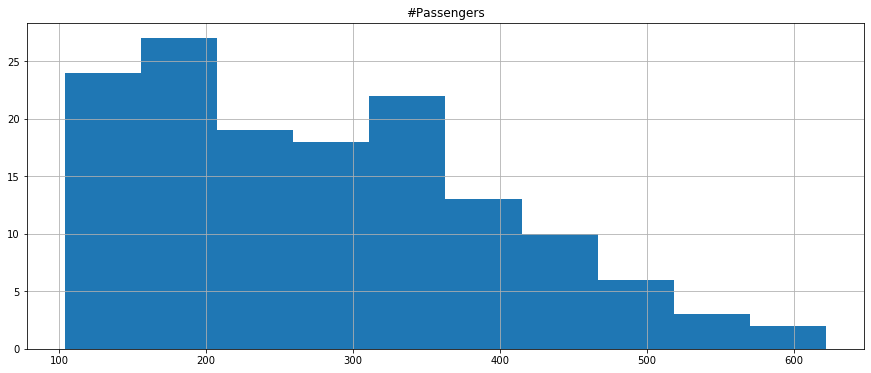

In [142]:
from matplotlib import pyplot
data.hist()
pyplot.show()

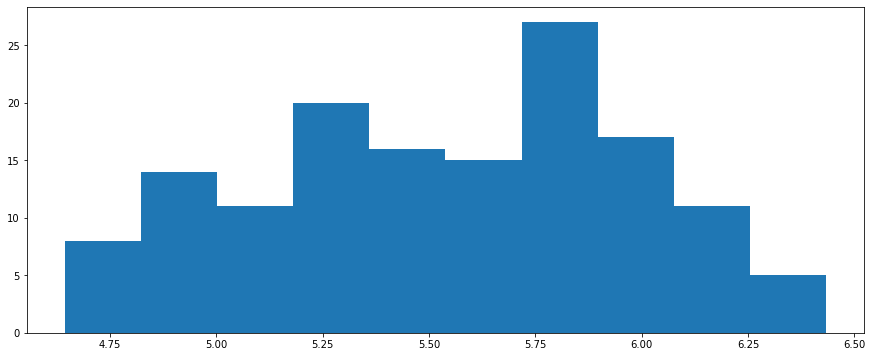

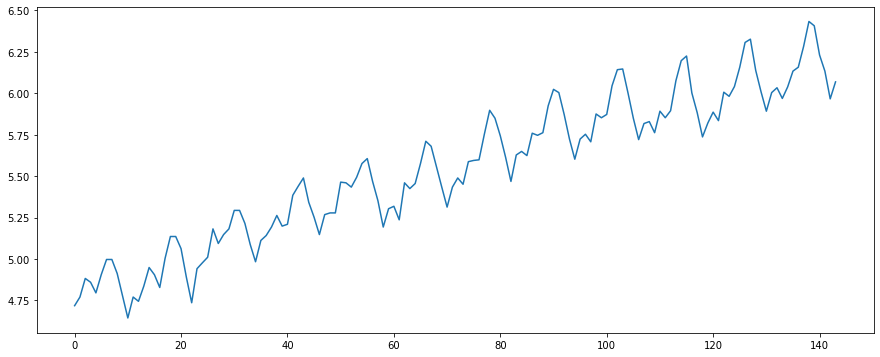

In [147]:
from numpy import log
from pandas import read_csv
data1 = read_csv('AirPassengers.csv', header=0,index_col=0)
X = data1.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

# Stationarity

_Statistical stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict_

__Stationarizing a time series through differencing (where needed) is an important part of the process of fitting an ARIMA model__

#### When mean, variance & Standard deviation remains constant

- But,practically its not possible to get this kind of data so, eliminating unnecessary trend, seasonality etc to be done 

- % stationary data is not possible 

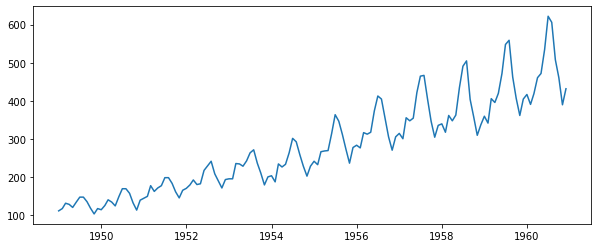

In [11]:
plt.figure(figsize=(10,4))
plt.plot(ts)

This shows the linear trend.

removing this becomes important to achieve stationarity of data 

### Use of adfuller method to test the stationarity of data

_The Augmented Dickey-Fuller test is a type of statistical test called a unit root test._

-  ___The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.___



- ___There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.___

-  _The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary._


-  __*Null Hypothesis (H0)*__: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.


-  __*Alternate Hypothesis (H1)*__: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


-  We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).


-  __*p-value > 0.05*__: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


-  __*p-value <= 0.05*__: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

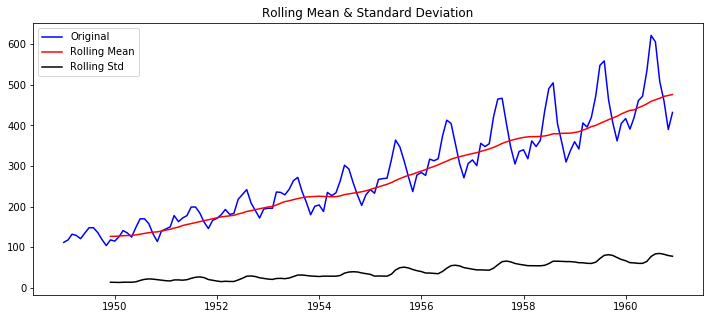

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
test_stationarity(ts)

- ___the 'p' value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.___

## Making ts Stationary

#### Estimationg & Eliminating Trend

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64 Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


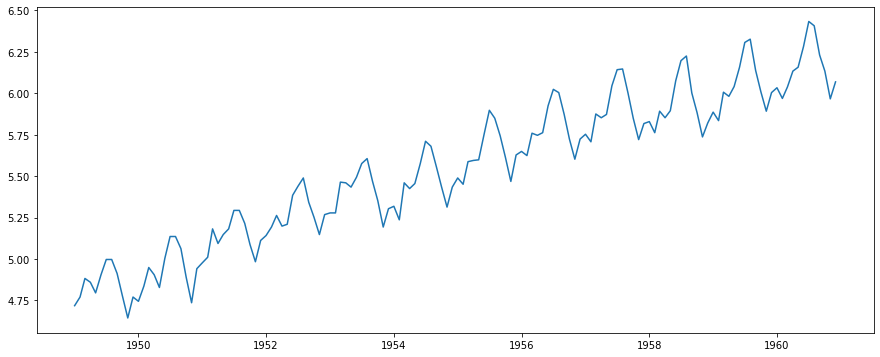

In [14]:
ts_log = np.log(ts)
print(ts_log,ts)
plt.plot(ts_log)

When 'log' is used it is for exposing the hidden pattern in data

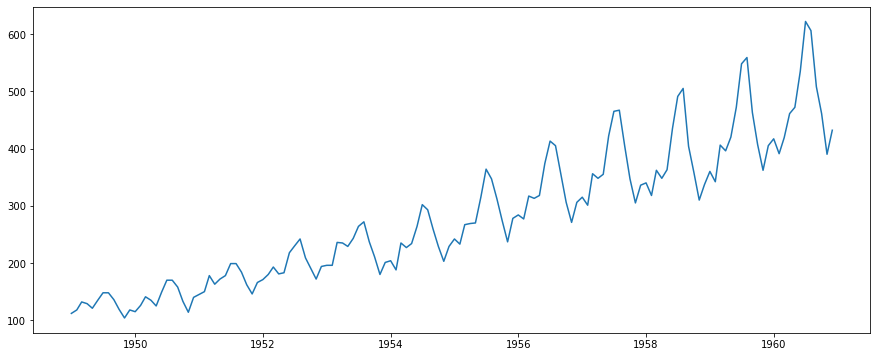

In [15]:
plt.plot(ts) # original data

On comparing, we can observe that the trend is compressed to certain extent but, not significantly

# Smoothening

### Moving Average, ( after taking the log perform smoothing on that)

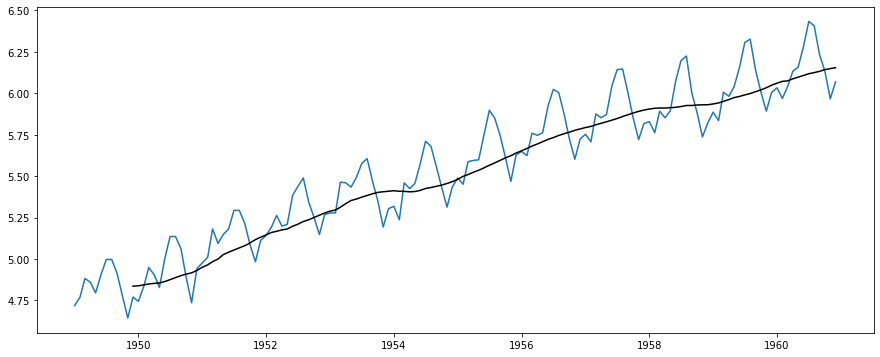

In [16]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='black')

Even after smoothing,we are unable to get the constant mean (observe the black line). When comapred with previous it is somewhat less but not constant

### Taking the difference from the log value & moving_avg values

In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

#### Can't have these NaN values so, fill it or drop it 

In [18]:
ts_log_moving_avg_diff.dropna(inplace= True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

In [19]:
ts_log_moving_avg_diff.shape

(133,)

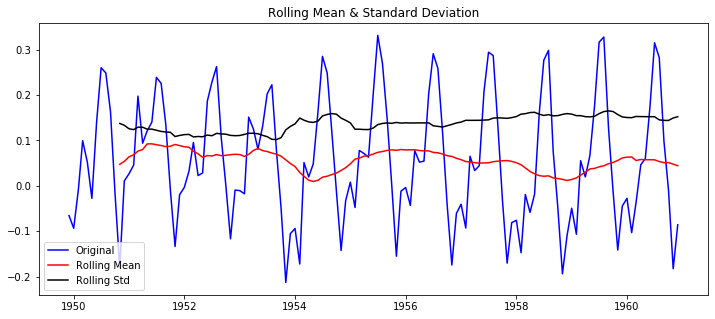

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [20]:
test_stationarity(ts_log_moving_avg_diff)

Observe here the 'p' value = 0.022 so, when compared to the original it is decreased 

### Exponentially Weighted Moving Average

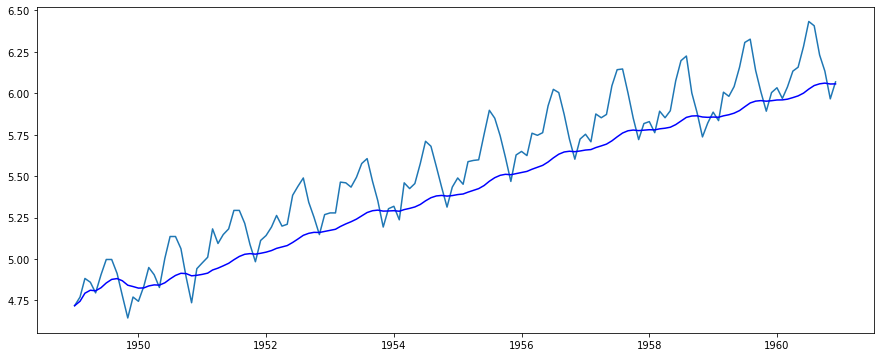

In [21]:
expweighted_avg = ts_log.ewm(halflife=12).mean() # means window size is 6 months not 12
plt.plot(ts_log)
plt.plot(expweighted_avg, color='blue')

Not satisfied with the results so, need some more processing

In [30]:
expweighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: #Passengers, Length: 144, dtype: float64

In [29]:
ts_log

(Month
 1949-01-01    4.718499
 1949-02-01    4.770685
 1949-03-01    4.882802
 1949-04-01    4.859812
 1949-05-01    4.795791
                 ...   
 1960-08-01    6.406880
 1960-09-01    6.230481
 1960-10-01    6.133398
 1960-11-01    5.966147
 1960-12-01    6.068426
 Name: #Passengers, Length: 144, dtype: float64,)

In [32]:
ts_log_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 143, dtype: float64

**It closely retain const mean & SD**

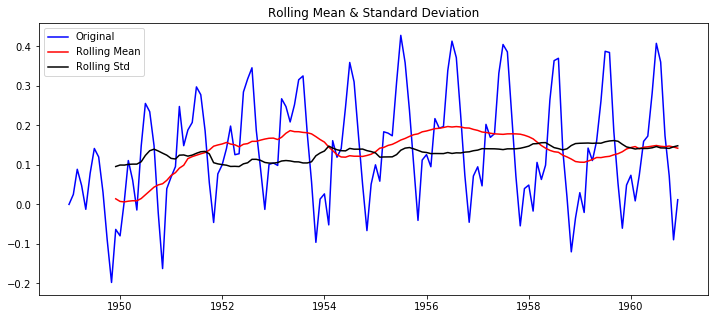

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [23]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

___SImilar to previous, but SD retainign but fluctuation still exists___

___Here the 'p' value is decreased when compared to previous work___


## Eliminating Trend & Seasionality 

### Differencing

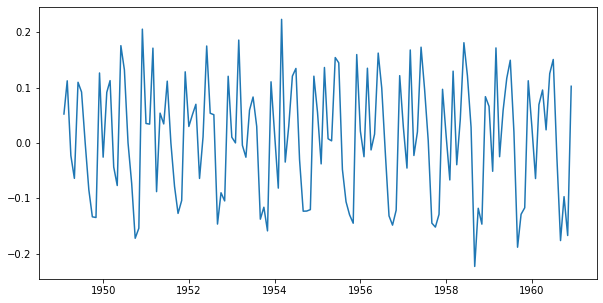

In [24]:
# taking the first difference
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift() 
plt.plot(ts_log_diff)

___Observe here that trend is not present___

In [33]:
ts_log.shift() # there is a shift in one month 

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: #Passengers, Length: 144, dtype: float64

In [34]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

___Idea is to maintain constant mean & variance while using shift___

<Figure size 864x432 with 0 Axes>

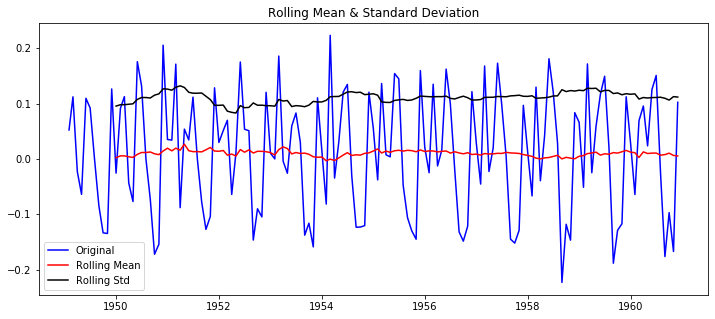

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

___'p' value is slightly higher comparitively but the SD & mean are very well maintained constantly___

_In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is named after the statisticians David Dickey and Wayne Fuller, who developed the test in 1979_

## Decomposition

Divide data into Trend, residual, seasonal

Here trend is eliminated but seasionality needs to be taken care

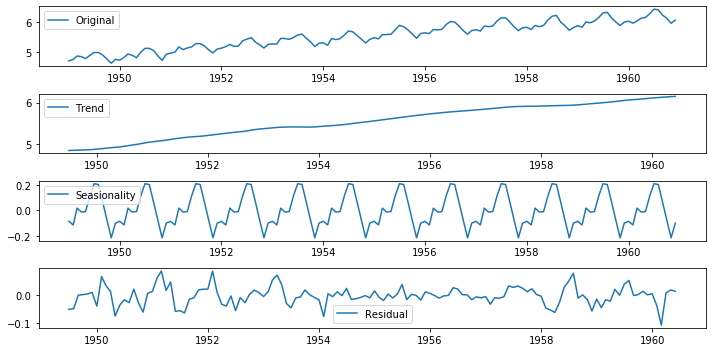

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411) # until here a empty rectangular box is plotted

plt.plot(ts_log, label='Original')
plt.legend(loc='best') # 'best ' implies, fit legend to best place suitable

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413) #numbers 412,413 implies plot separately else it'll merge
plt.plot(seasonal, label='Seasionality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout() # if not given the 'year 1950' gets hidded over other graphs

<Figure size 864x360 with 0 Axes>

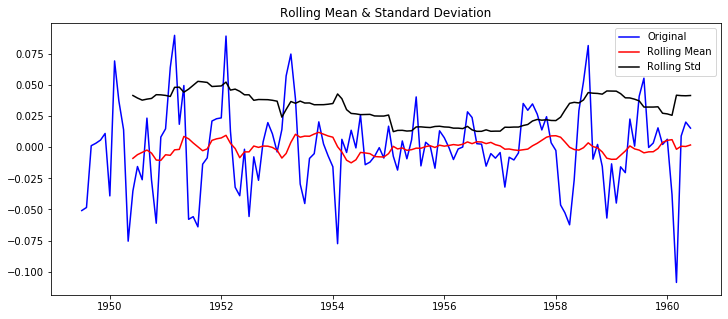

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [66]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

___SD & means are not good___

# Final Forecasting

###  ARIMA :Auto Regressive(AR) Integrated (I) Moving Average (MA)

In [67]:
 from statsmodels.tsa.arima_model import ARIMA

### Auto correlation:

- __We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series,it is called autocorrelation (self-correlation).__
  
  
- __A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.__


- __Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.__


- __This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.__

#### ACF : __Auto Correlation Factor__   

#### PACF: Partial Auto Correlation Factor
when ACF is good we can only go for __AR__ model

if partial crrelation exists __MA__ can be used 

when data if you do not have any idea go with __ARIMA__

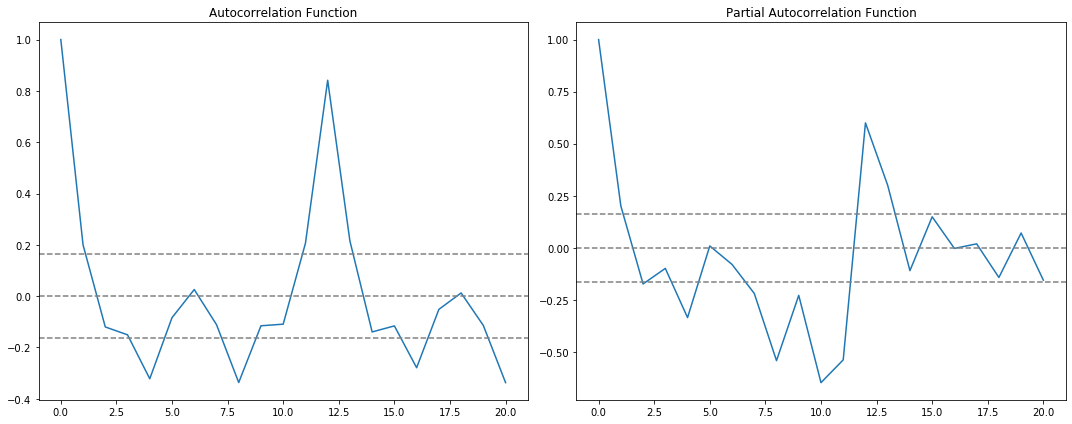

In [75]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20) #natural log- nlags
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
#plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

__correlation = 1 means it is a trend, maintains linearity in data, it goes to 0 but few point lies here & maximum data is not here__

__-2 to 2 is the range in ACF__

__In PACF it is between -0.125 to1.25__

___Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).___

### Using ARIMA

## AR model- (2, 1, 0)

### (p, d, q) - (AR, I, MA)

__0means disabled, other number for enabling it__

it will map certain parts observe here the residual value 1.5023

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

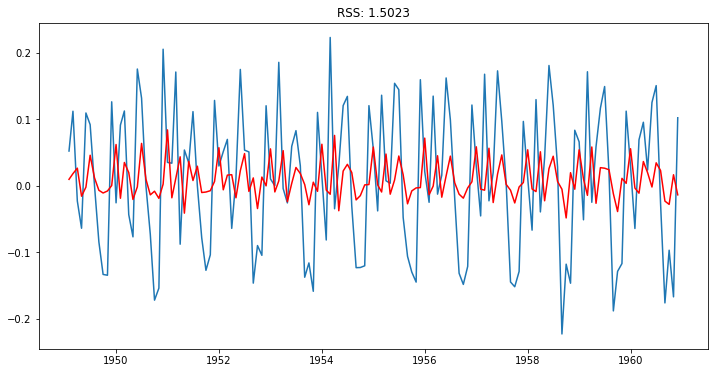

In [105]:
model = ARIMA (ts_log, order=(2, 1, 0)) # AR-2, I-2, MA-0. if MA-1 means ARIMA 
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA model- (0, 1, 2)

observe her the residual value as 1.4721

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

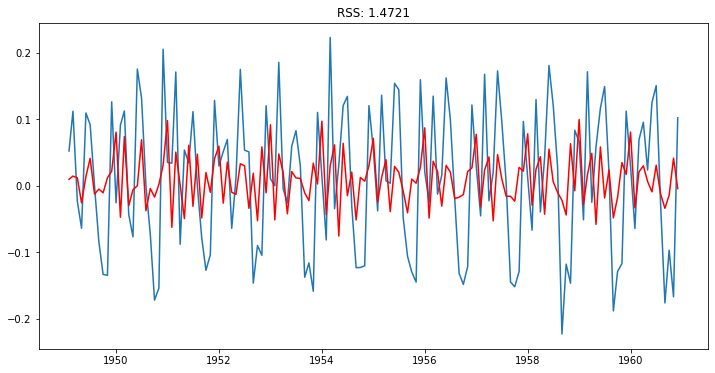

In [108]:
model = ARIMA (ts_log, order=(0, 1, 2)) # AR-2, I-2, MA-0. if MA-1 means ARIMA 
results_MA = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

##  ARIMA model- (2, 1, 2)

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

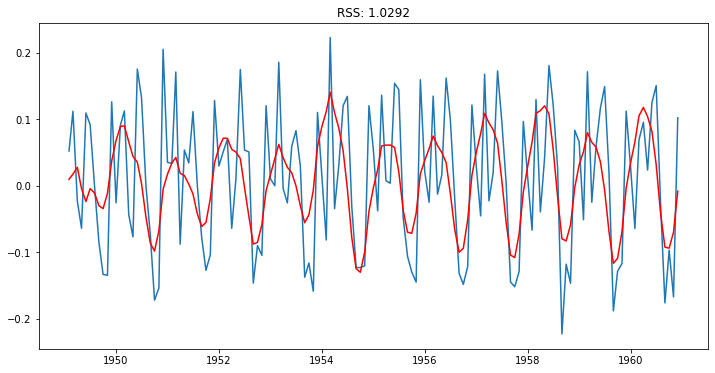

In [109]:
model = ARIMA (ts_log, order=(2, 1, 2)) # AR-2, I-2, MA-0. if MA-1 means ARIMA 
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

__The residual square value here is 1.0292__

__Also here the predictions are according to the actual vlaues & thus ARIMA is best suited for time series values__

## Covert to riginal scale

In [110]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [113]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head()) # numpy.cumsum() function is used 
#when we want to compute the cumulative sum of array elements over a given axis.

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [116]:
# predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
# predictions_ARIMA_log.head() #here same results is generated thusin next step we add the cumulative sum to this 

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [124]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

__Predictions__

In [121]:
predictions_ARIMA_log.head(10) # Predicted values

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
1949-06-01    4.718499
1949-07-01    4.718499
1949-08-01    4.718499
1949-09-01    4.718499
1949-10-01    4.718499
dtype: float64

__Original values__

In [122]:
ts_log.head(10) # Original values

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

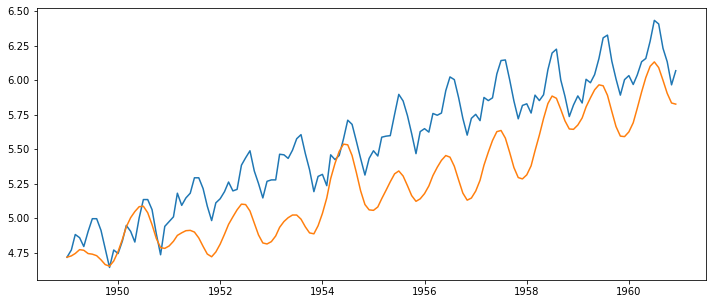

In [125]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

__The model predicts almost similar to the actual values__

Text(0.5, 1.0, 'RMSE: 90.1047')

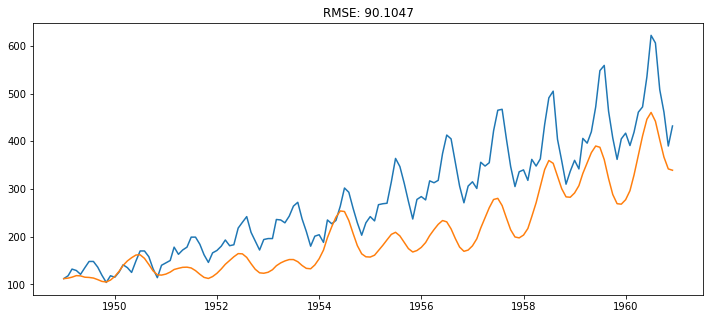

In [129]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [127]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301990
1949-05-01    117.768367
                 ...    
1960-08-01    441.885633
1960-09-01    402.905187
1960-10-01    366.752843
1960-11-01    341.984186
1960-12-01    339.216186
Length: 144, dtype: float64

In [128]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


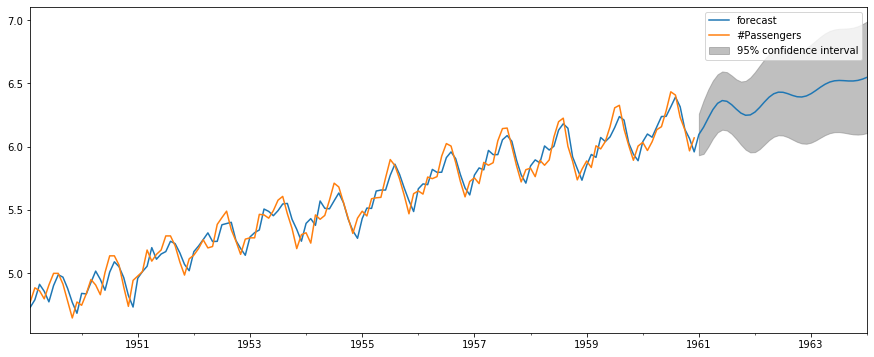

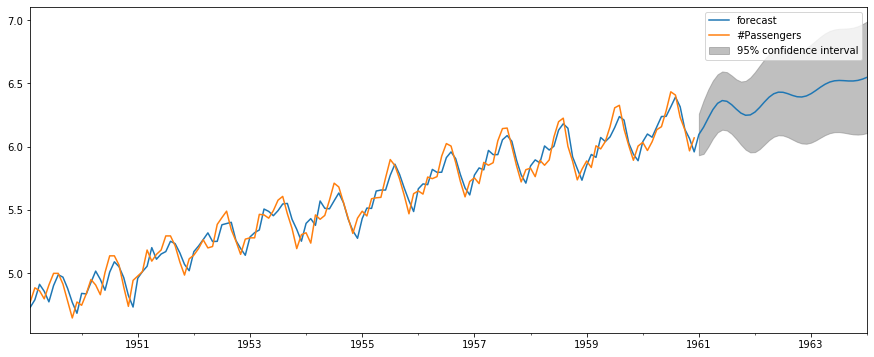

In [131]:
results_ARIMA.plot_predict(1,180)
# we have almost 10years = 120 months so predict + next 5 years (12*5=60)= 180

__Confidence interval is the range in which the predictions might lie. since, we cannot 100% predict the future but can have a range in which the data might lie__

__this results_ARIMA can be used as a pickle file &deployement can be done__

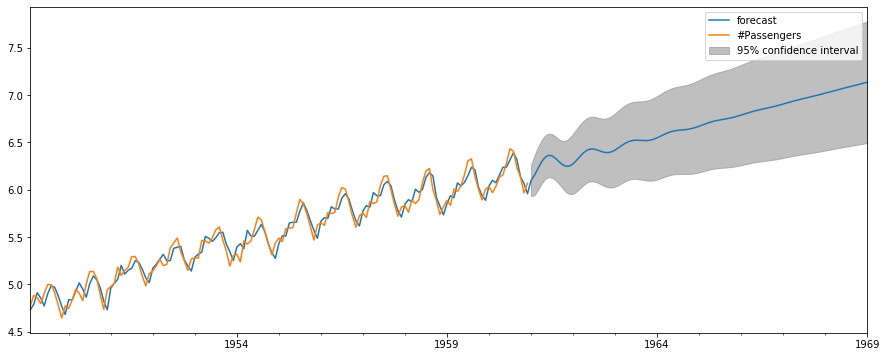

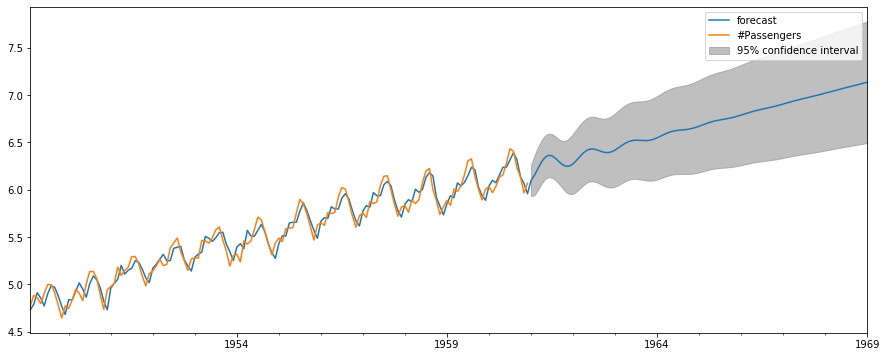

In [132]:
results_ARIMA.plot_predict(1,240) # for next 15years

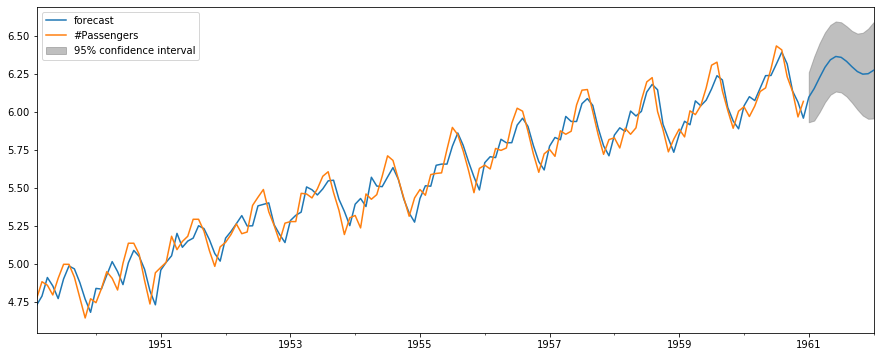

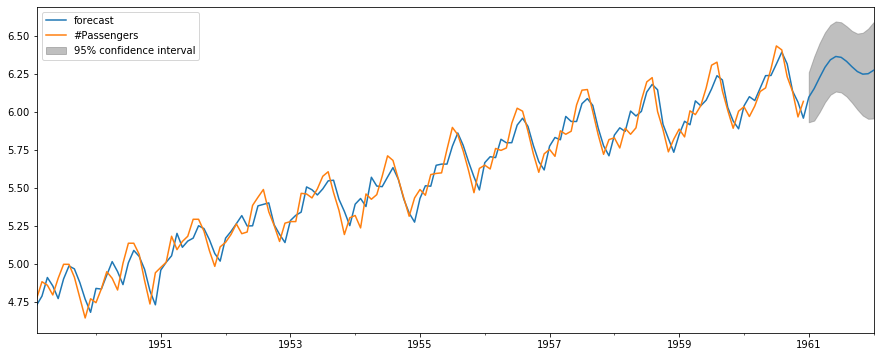

In [134]:
results_ARIMA.plot_predict(1,156) # for next 3years (so add 12*3=36 to 120)

In [135]:
x = results_ARIMA.forecast(steps=156)
x 

(array([6.09553392, 6.15281402, 6.22442963, 6.29241097, 6.3416471 ,
        6.36359354, 6.35784678, 6.33139297, 6.29597534, 6.26447708,
        6.2473832 , 6.25025166, 6.27275829, 6.30940304, 6.35151484,
        6.38988645, 6.4172737 , 6.43011043, 6.42906678, 6.41842478,
        6.40456144, 6.39403604, 6.39183071, 6.40019491, 6.41833679,
        6.44295394, 6.46937421, 6.49293972, 6.51024104, 6.51989018,
        6.52267563, 6.52112372, 6.51864511, 6.51853673, 6.52311906,
        6.53322343, 6.54812852, 6.5659154 , 6.58410291, 6.60036521,
        6.61313247, 6.62192762, 6.62737769, 6.63093108, 6.63438668,
        6.63937964, 6.64696483, 6.65739819, 6.67015303, 6.68414229,
        6.69806604, 6.71077878, 6.72157709, 6.7303396 , 6.73749786,
        6.74386354, 6.75037298, 6.75782567, 6.76668656, 6.77699797,
        6.78841293, 6.80032827, 6.81207168, 6.82308733, 6.83307108,
        6.84202464, 6.85022283, 6.85811192, 6.8661731 , 6.87479121,
        6.88416272, 6.89426353, 6.90487859, 6.91

__The above results are forecasted forthe net 3 years__